In [1]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
#import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\Cougar\Desktop\Python Github\JupyterNoteboooks


In [2]:
import requests as rq

In [ ]:
# math.ceil() arba np.ceil()   suaplvalina i aukstesne puse

In [147]:
#nuskaitykite auto.csv failą į dataframe'ą.
auto = pd.read_csv('auto.csv', sep='|')[['gamintojas', 'modelis', 'price', 'rida', 'kuro_tipas', 'pagaminimo_data']]
auto.head(2)
# prie lentelės pridėkite naują stulpelį, kur būtų rida, suapvalinta 15 000 km intervalais.
# apvalinama į aukštesnę pusę:
#  1 km turi tapti 15 000 km
# 5600 km turi tapti 15 000 km
# 15 001 km turi tapti 30 000 km
# 25 800 km turi tapti 30 000 km
# 30 001 km turi tapti 45 000 km
def txt_to_sk(tekstas):
    try:
        sk = float(tekstas.replace(' ', '').replace('km', ''))
        return sk
    except:
        return -1
    
auto['Rida'] = auto['rida'].apply(txt_to_sk)
auto['price'] = auto['price'].apply(txt_to_sk)
auto['apvalintaRida'] =np.ceil(auto['Rida'] / 15000) * 15000
auto.head()
# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
vidKaina = auto['price'].mean()
vidKaina
GamVidKaina = auto.groupby('gamintojas').mean(numeric_only=True).reset_index()
GamVidKaina

BrangusAuto = GamVidKaina.query('price >= @vidKaina').sort_values(by='price')
BrangusAuto.tail()
# kainą. (groupby, reset_index, query)
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.
def autoAmzius(amzius): #funkcija leidzia suzinoti auto amziu
    return 2024 - float(amzius[:4])
auto['Amzius'] = auto['pagaminimo_data'].apply(autoAmzius)   # pridedu stulpeli su auto amzium 'metai'"15_paskaita 2024_04_09.ipynb"
BrangusAuto = auto.groupby('gamintojas').mean(numeric_only=True).sort_values(by='price') # 5 brangiausi gamintojai
br5 = BrangusAuto.tail().reset_index()
br5
# ARBA GALIMA SPRESTI SU QUERY TAIP:


# Top5 = list(BrangusAuto['gamintojas'].tail(5).reset_index()['gamintojas'].values)
# print(Top5)

# def ConvertAmzius(sk):
#     return 2024 - float(sk[:4])
# auto['metai'] = auto['pagaminimo_data'].apply(ConvertAmzius)

# VidAmzius = auto.query('gamintojas == @Top5').groupby('gamintojas').mean(numeric_only=True).reset_index()
# VidAmzius.head()


# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.
# g = list(br5['gamintojas'])  REIKIA PASIDARYTI SARASA 5 BRANGIAUSIU AUTOMOBILIU
# print(g)
# grafikas = sns.boxplot(data=auto.query('gamintojas in @g').sort_values(by='gamintojas'), x='gamintojas', y='Amzius', showmeans=True, showfliers=False)
# plt.show()

# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale

# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo
# atvaizduokite boxplotas kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?

# import math

# auto = pd.read_csv('auto.csv', sep='|')
# auto['rida_apvalinta'] = auto['rida'].apply(lambda x: math.ceil(x / 15000) * 15000)
# print(auto.head())


,gamintojas,price,Rida,apvalintaRida,Amzius
0,Maserati,34950.000000,215000.000000,225000.0,7.000000
1,Land Rover,40925.000000,133625.000000,138750.0,6.750000
2,Tesla,45666.666667,104155.777778,110000.0,5.888889
3,Porsche,61999.900000,103957.400000,111000.0,8.200000
4,Aston Martin,125000.000000,45000.000000,45000.0,9.000000


['Maserati', 'Land Rover', 'Tesla', 'Porsche', 'Aston Martin']


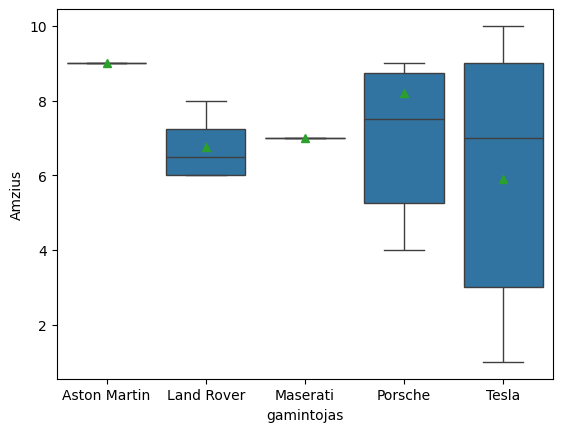

In [148]:
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.
g = list(br5['gamintojas'])
print(g)
grafikas = sns.boxplot(data=auto.query('gamintojas in @g').sort_values(by='gamintojas'), x='gamintojas', y='Amzius', showmeans=True, showfliers=False)
plt.show()


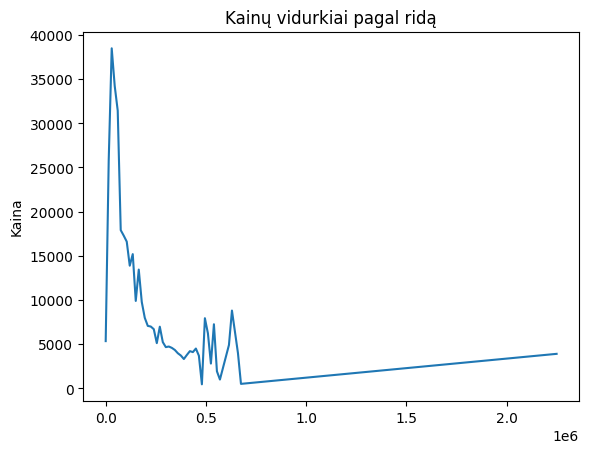

In [156]:
# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale

ridu_int = auto.groupby('apvalintaRida').mean(numeric_only=True).sort_values(by='apvalintaRida').reset_index() # 5 brangiausi gamintojai
ridu_int
fig, grafikas = plt.subplots()
grafikas.plot(ridu_int['apvalintaRida'], ridu_int['price'])
grafikas.set_ylabel('Kaina')
plt.title('Kainų vidurkiai pagal ridą') 
plt.show()


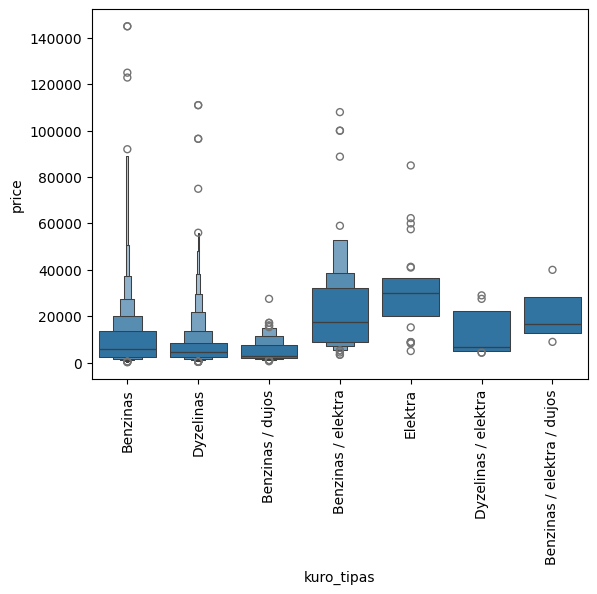

In [160]:
# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo
grafikas = sns.boxenplot(data = auto, x = 'kuro_tipas', y = 'price')
grafikas.tick_params(axis = 'x', rotation=90)
plt.show()

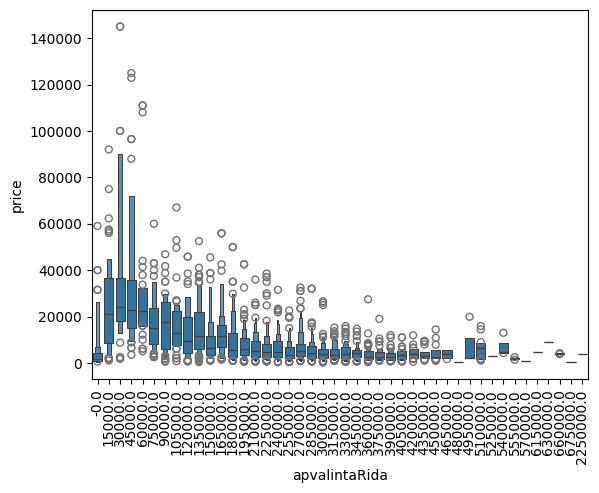

In [161]:
# atvaizduokite boxplotas kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
grafikas = sns.boxenplot(data = auto, x = 'apvalintaRida', y = 'price')
grafikas.tick_params(axis = 'x', rotation=90)
plt.show()

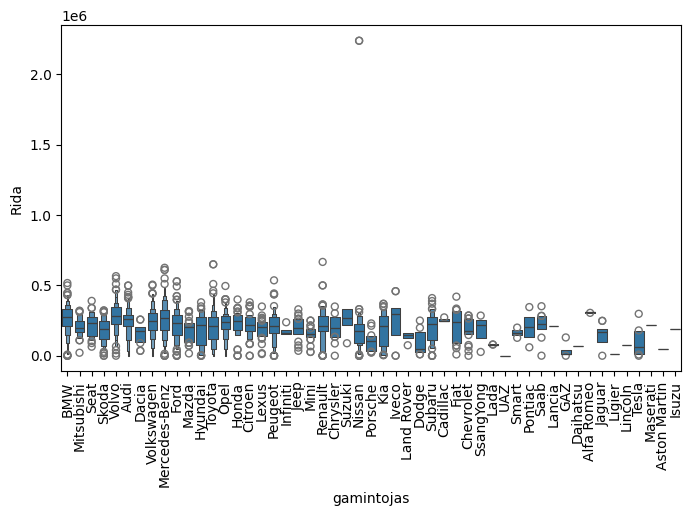

In [169]:
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo
fig = plt.figure(figsize=[8,4.5])
grafikas = sns.boxenplot(data = auto, x = 'gamintojas', y = 'Rida')
grafikas.tick_params(axis = 'x', rotation=90)
plt.show()

In [18]:
np.ceil(15001 / 15000) * 15000

30000.0

In [133]:
#DESTYTOJO SPRENDIMAS

#nuskaitykite auto.csv failą į dataframe'ą.

auto = pd.read_csv('auto.csv', sep='|')[['gamintojas','rida','price','pagaminimo_data','modelis','variklis','kuro_tipas']]
auto['price'] = auto['price'].str.replace(' ','').apply(float)
auto['amzius'] = 2024 - auto['pagaminimo_data'].str[:4].apply(int)

# prie lentelės pridėkite naują stulpelį, kur būtų rida, suapvalinta 15 000 km intervalais.
# apvalinama į aukštesnę pusę:
#  1 km turi tapti 15 000 km
# 5600 km turi tapti 15 000 km
# 15 001 km turi tapti 30 000 km
# 25 800 km turi tapti 30 000 km
# 30 001 km turi tapti 45 000 km
# NOTE - čia geriau turėti naują DF, kur 

autoR = auto.query('rida != "Nenurodyta"')[['gamintojas','rida','price','amzius','kuro_tipas']]
autoR['rida'] = autoR['rida'].str.replace(' ','').str.replace('km','').apply(float)
autoR['R'] = np.ceil(autoR['rida']/15000.0)*15000.0

# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą. (groupby, reset_index, query)
vidK = auto['price'].mean()
BrA5 = auto.groupby('gamintojas').mean(numeric_only=True).reset_index().query('price > @vidK').sort_values(by='price',ascending=False).head()
BrA5[['gamintojas','amzius']]
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.

,gamintojas,amzius
1,Aston Martin,9.000000
37,Porsche,8.200000
46,Tesla,5.888889
24,Land Rover,6.750000
28,Maserati,7.000000


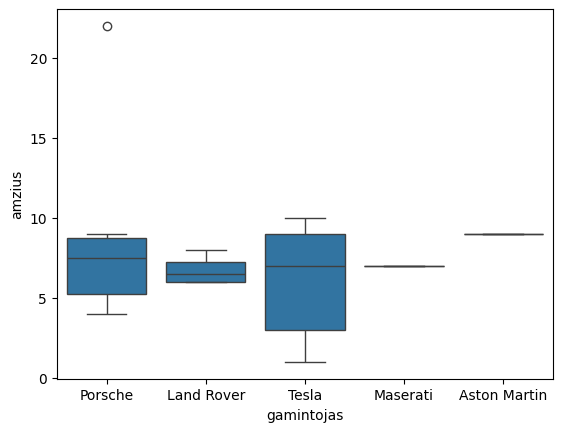

In [134]:
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.
A5 = BrA5['gamintojas'].values.tolist()
sns.boxplot(data=auto.query('gamintojas in @A5'), x='gamintojas',y='amzius')
plt.show()

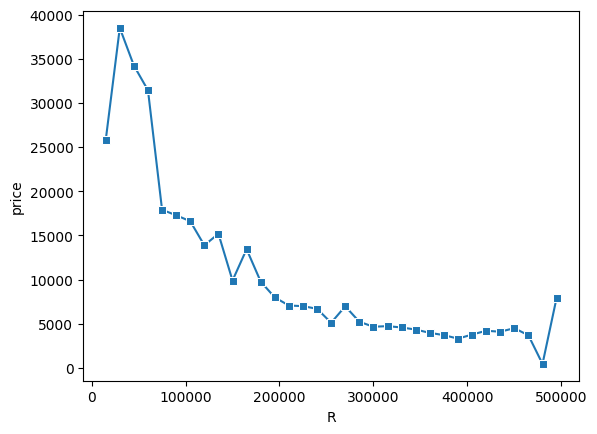

In [135]:
# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale

ridos = autoR.query('R < 5e5').groupby('R').mean(numeric_only=True).reset_index()[['R','price']]
sns.lineplot(data=ridos, x='R',y='price',marker='s')
plt.show()

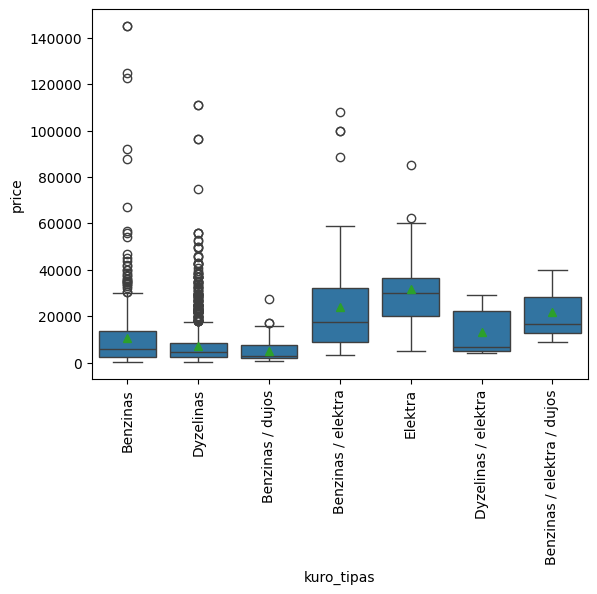

In [136]:
# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo
axc = sns.boxplot(data=auto,x='kuro_tipas',y='price',showmeans=True)
axc.tick_params(axis='x',rotation=90)
plt.show()

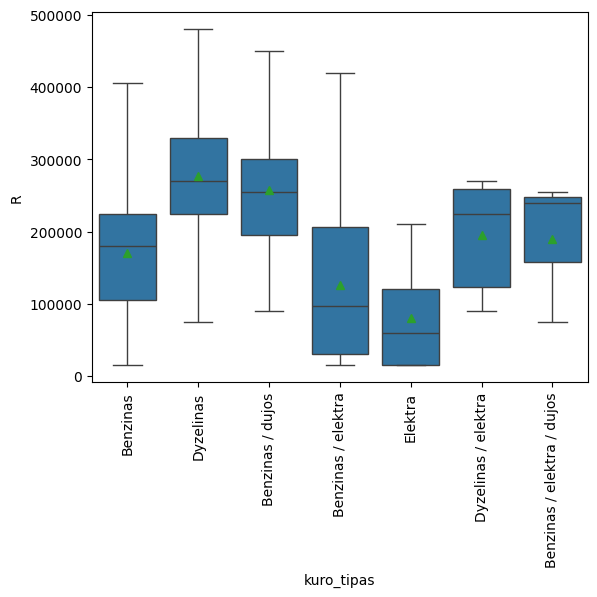

In [137]:
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo

axc = sns.boxplot(data=autoR,x='kuro_tipas',y='R',showmeans=True, showfliers=False)
axc.tick_params(axis='x',rotation=90)
plt.show()

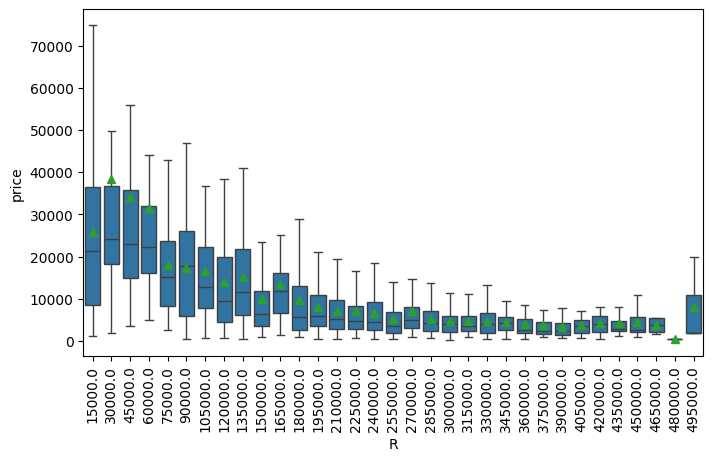

In [138]:
# atvaizduokite boxplotais kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
fig = plt.figure(figsize=[8,4.5])
ax = sns.boxplot(data=autoR.query('R <5e5'), x='R',y='price',showmeans=True,showfliers=False)   #5e5 yra tas pats 5*10^5
ax.tick_params(axis='x', rotation=90)
plt.show()

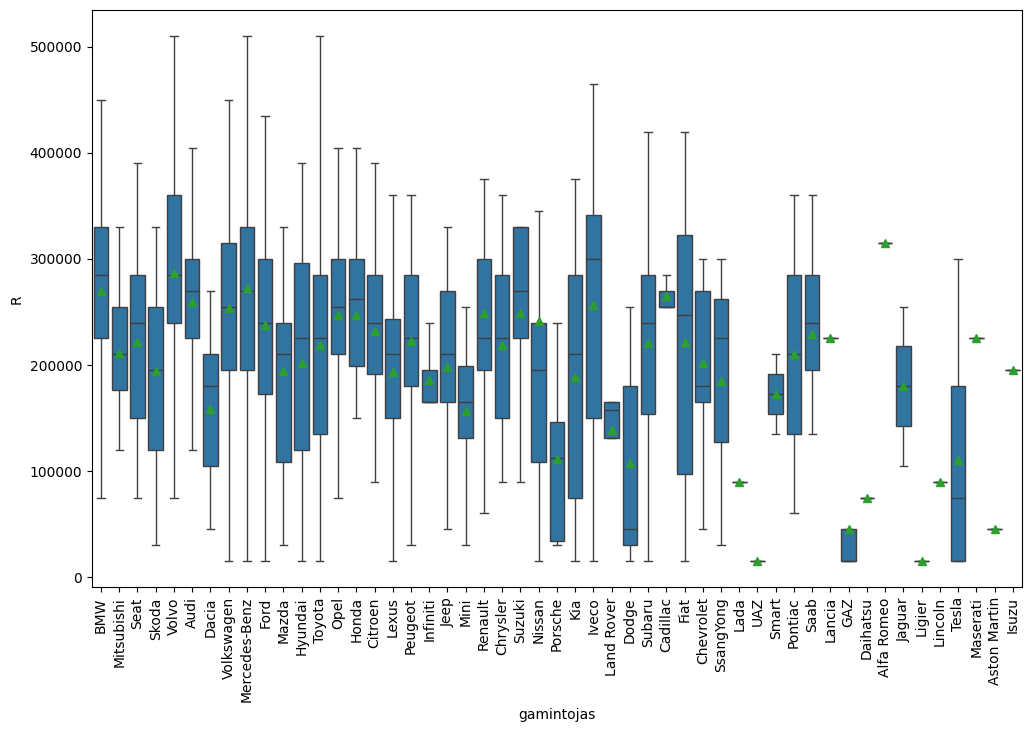

In [139]:
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo
fig, ax = plt.subplots(figsize=[12,7.5])
ax = sns.boxplot(data=autoR, x='gamintojas', y='R',showmeans=True, showfliers=False)
ax.tick_params(axis='x',rotation=90)
plt.show()

In [ ]:
# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?